In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score,classification_report,confusion_matrix

In [9]:
df = pd.read_csv("/content/creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [10]:
df.shape

(35742, 31)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35742 entries, 0 to 35741
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    35742 non-null  int64  
 1   V1      35742 non-null  float64
 2   V2      35742 non-null  float64
 3   V3      35742 non-null  float64
 4   V4      35742 non-null  float64
 5   V5      35742 non-null  float64
 6   V6      35741 non-null  float64
 7   V7      35741 non-null  float64
 8   V8      35741 non-null  float64
 9   V9      35741 non-null  float64
 10  V10     35741 non-null  float64
 11  V11     35741 non-null  float64
 12  V12     35741 non-null  float64
 13  V13     35741 non-null  float64
 14  V14     35741 non-null  float64
 15  V15     35741 non-null  float64
 16  V16     35741 non-null  float64
 17  V17     35741 non-null  float64
 18  V18     35741 non-null  float64
 19  V19     35741 non-null  float64
 20  V20     35741 non-null  float64
 21  V21     35741 non-null  float64
 22

In [21]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35742.000000,35741.000000,35741.000000,35741.000000,35741.000000,...,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000,35741.000000
mean,23997.300823,-0.208427,0.072579,0.718292,0.195733,-0.216686,0.095575,-0.116847,0.032755,0.259459,...,-0.030876,-0.113555,-0.041571,0.007469,0.135958,0.021813,0.010836,0.003834,84.203356,0.002882
std,12423.654094,1.836736,1.540565,1.540896,1.409063,1.388746,1.310633,1.257788,1.242285,1.238161,...,0.769829,0.640398,0.545241,0.593343,0.435886,0.506559,0.388306,0.302016,227.279858,0.053606
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-42.147898,-23.496714,-26.548144,-41.484823,-7.175097,...,-20.262054,-8.593642,-26.751119,-2.836627,-7.495741,-1.438650,-8.567638,-9.617915,0.000000,0.000000
25%,12283.500000,-0.960139,-0.499301,0.244741,-0.714475,-0.818199,-0.644998,-0.598057,-0.155602,-0.523422,...,-0.239644,-0.536461,-0.178485,-0.326932,-0.127310,-0.331727,-0.063200,-0.007248,6.990000,0.000000
50%,28992.000000,-0.234480,0.114024,0.827554,0.188607,-0.255034,-0.163054,-0.073069,0.043456,0.135169,...,-0.081611,-0.087516,-0.051996,0.061818,0.175722,-0.063275,0.008848,0.021087,22.000000,0.000000
75%,34258.000000,1.162263,0.755015,1.456358,1.078531,0.302991,0.485169,0.436560,0.307599,0.991696,...,0.094995,0.296665,0.076214,0.398791,0.421085,0.301153,0.086772,0.076006,76.000000,0.000000
max,38241.000000,1.960497,16.713389,4.101716,13.143668,34.099309,22.529298,36.677268,20.007208,10.392889,...,22.614889,5.805795,13.876221,4.014444,5.525093,3.517346,11.135740,5.678671,7879.420000,1.000000


In [11]:
df['Class'].nunique()

2

In [12]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [16]:
 df1= df.fillna(df.median())

In [17]:
df1.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
print(sorted(Counter(df1['Class']).items()))

[(0.0, 35639), (1.0, 103)]


In [22]:
fraud =df1[df1['Class']==1]
not_fraud = df1[df1['Class']==0]

In [23]:
print(fraud.shape,not_fraud.shape,df.shape)

(103, 31) (35639, 31) (35742, 31)


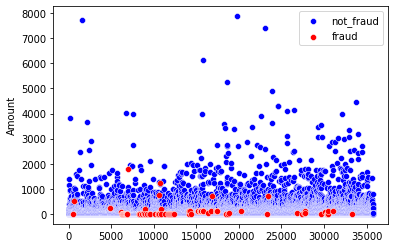

In [24]:
sns.scatterplot(data=not_fraud['Amount'],color='blue')
sns.scatterplot(data=fraud['Amount'],color='red')
plt.legend(['not_fraud','fraud'])

In [26]:
print("Fraud Cases in our data set : ",len(fraud)*100/len(data2)," %")
print("Non Fraud Cases in our data set : ",len(not_fraud)*100/len(data2)," %")

Fraud Cases in our data set :  0.28817637513289684  %
Non Fraud Cases in our data set :  99.71182362486711  %


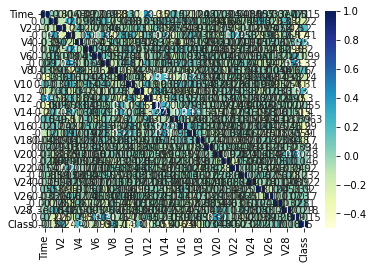

In [25]:
dataplot = sns.heatmap(df1.corr(), cmap="YlGnBu", annot=True)

In [ ]:
X = df1
Y = df1['Class']

In [ ]:
X.drop('Time',axis=1,inplace=True)
X.drop('Class',axis=1,inplace=True)
X.columns

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21',
       'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')

# **SMOTE**

In [ ]:
#Spliting data
x_train,x_test,y_train,y_test=train_test_split(x_smote,y_smote,test_size=0.3,random_state=1)


In [ ]:
from imblearn.over_sampling import SMOTE
smote=SMOTE(random_state=50)
x_smote,y_smote=smote.fit_resample(X,Y)

In [ ]:
print("After OverSampling, counts of label '1': {}".format(sum(y_smote == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_smote == 0)))

After OverSampling, counts of label '1': 15863
After OverSampling, counts of label '0': 15863


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


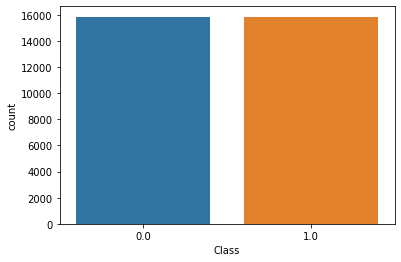

In [ ]:
sns.countplot(y_smote)

# **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_smote, y_smote)
predictions = lr.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99      4879
         1.0       0.99      0.99      0.99      4639

    accuracy                           0.99      9518
   macro avg       0.99      0.99      0.99      9518
weighted avg       0.99      0.99      0.99      9518



/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# **KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()
KNN.fit(x_smote, y_smote)
predictions = KNN.predict(x_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      4879
         1.0       1.00      1.00      1.00      4639

    accuracy                           1.00      9518
   macro avg       1.00      1.00      1.00      9518
weighted avg       1.00      1.00      1.00      9518

